In [402]:
import SiteSearch as sitesearch
reload(sitesearch)

import pandas as pd
pd.options.display.max_columns = 200
pd.options.display.max_rows = 10000

%load_ext line_profiler
#%lprun?

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


In [403]:
xml = "input.xml"

In [404]:
%lprun -f sitesearch.evaluateXML -f sitesearch.objective_raster.buildCategoricalRasterStatFromXML dfs = sitesearch.evaluateXML(xml,returnDFInsteadOfLayerID=True)

C:/Users/RDCERNWG/Documents/GIT/FLW_Missouri Mission Folder/Results/ 1 3857
Section: Site Searches
Beginning site search 1 of 2: Airfield 1
WKT Template
Gridded Search
Generated 2950 candidate polygons in 1 seconds
Categorical Raster Stat: Criteria_1. Processed 2950 candidates in 20 seconds, retaining 2950 candidates
Continuous Raster Stat: Criteria_2. Processed 2950 candidates in 22 seconds, retaining 2950 candidates
Vector Layer: Criteria_3. Processed 2950 candidates in 22 seconds, retaining 2950 candidates
Cut Fill: Criteria_4. Processed 2950 candidates in 22 seconds, retaining 2950 candidates
Completed site search 1 of 2 for Airfield 1.  Returned top 100 candidates of 2950.
Beginning site search 2 of 2: airfield 2
WKT Template
Gridded Search
Generated 1482 candidate polygons in 0 seconds
Categorical Raster Stat: LC_LandCover_GeoCover_proj_less than. Processed 1482 candidates in 10 seconds, retaining 1482 candidates
Continuous Raster Stat: Road_Distance_greater than. Processed 1482 

Timer unit: 3.52618e-07 s

Total time: 31.536 s
File: Objective_Raster.py
Function: buildCategoricalRasterStatFromXML at line 137

Line #      Hits         Time  Per Hit   % Time  Line Contents
   137                                           def buildCategoricalRasterStatFromXML(evaluationDF,criteriaRow):
   138                                               """ Converts XML into categorical raster statistic evaluation
   139                                           
   140                                                   Evaluation function
   141                                           
   142                                               Args:
   143                                                   evaluationDF (lxml): Set of candidate solutions
   144                                                   criteriaRow (lxml): CategoricalRasterStat
   145                                           
   146                                               Returns:
   147                   

In [405]:
df0 = dfs[0]
df1 = dfs[1]
scoreDF = dfs[2]

In [406]:
scoreDF

,MCDA_SCORE,Routing,Euclidean


Text(0.5,0.98,u'Areas of Interest')

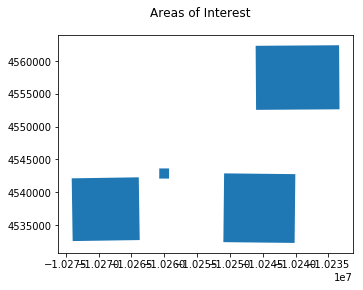

In [281]:
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline
aoiDF = gpd.read_file("../FLW_Missouri Mission Folder/SUPPORT/Staging.shp")
aoiDF = aoiDF.to_crs({'init':'epsg:3857'})
squareDimension = 400
aoiDF.plot()
plt.suptitle("Areas of Interest")

In [282]:
aoiDF_unproj = aoiDF.to_crs({'init':'epsg:4326'})
airfieldAOI = aoiDF_unproj[aoiDF_unproj['Stage']=='Gold'].reset_index().geometry[0]
baseObjective1AOI = aoiDF_unproj[aoiDF_unproj['Stage']=='Red'].reset_index().geometry[0]
baseObjective2AOI = aoiDF_unproj[aoiDF_unproj['Stage']=='Blue'].reset_index().geometry[0]
cbitec = aoiDF_unproj[aoiDF_unproj['Stage']=='White'].reset_index().geometry[0]

print "Airfield: %s" %(str(airfieldAOI.to_wkt()))
print "Red: %s" %(str(baseObjective1AOI.to_wkt()))
print "Blue: %s" %(str(baseObjective2AOI.to_wkt()))
print "CBITEC: %s" %(str(cbitec.to_wkt()))
print "CBITEC centroid: %s" %(cbitec.centroid)

projectedAirfield = aoiDF[aoiDF['Stage']=='Gold'].reset_index().geometry[0]
print "projectedAirfield: %s" %(projectedAirfield.to_wkt())
print "projected airfield centroid: %s" %(projectedAirfield.centroid)

Airfield: POLYGON ((-92.0420407203899770 37.8786674360582940, -91.9278626441980150 37.8792673513784450, -91.9272790878007130 37.8100408421962090, -92.0414571639926610 37.8094403634696410, -92.0420407203899770 37.8786674360582940))
Red: POLYGON ((-92.2937812277846770 37.7353612509118080, -92.2020132175820070 37.7364461384693680, -92.2007296144230250 37.6685084584884250, -92.2924976246256680 37.6674225761625930, -92.2937812277846770 37.7353612509118080))
Blue: POLYGON ((-92.0852172668016210 37.7407181466318420, -91.9877289887035090 37.7398891889496540, -91.9887410491910630 37.6654206226553260, -92.0862293272891320 37.6662504135641640, -92.0852172668016210 37.7407181466318420))
CBITEC: POLYGON ((-92.1739596373465990 37.7460796171828790, -92.1605301799799010 37.7460417042094390, -92.1605803079124400 37.7350642138074620, -92.1740077823008480 37.7351021118712140, -92.1739596373465990 37.7460796171828790))
CBITEC centroid: POINT (-92.16726947722954 37.7405720468603)
projectedAirfield: POLYGON